In [191]:
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import pandas as pd

from scipy import stats
import scikit_posthocs as sp

### Read data from json files

In [289]:
with open('RMP.json') as json_file:
    rmp_all = json.load(json_file)

with open('Currents.json') as json_file:
    currents_all = json.load(json_file)   

with open('AP_single.json') as json_file:
    ap_all = json.load(json_file)

with open('AP_trains.json') as json_file:
    trains_all = json.load(json_file)

In [150]:
def statistic(group_a_data, group_b_data):
    
    bonferroni_correction_factor = 9
    
    statistic, p_value_a = stats.shapiro(group_a_data)
    statistic, p_value_b = stats.shapiro(group_b_data)
    
    if (p_value_b < 0.05) or (p_value_a < 0.05):
        # data is not normally distrubuted (<0.05)
        statistic, p_value = stats.mannwhitneyu(group_a_data, group_b_data, alternative='two-sided')
        print('Mann Whitney U: p-value='+"{:.10f}".format(p_value*bonferroni_correction_factor))
    else:
        # data is normally distributed
        # test for equal variance
        statistic, p_value = stats.bartlett(group_a_data, group_b_data)
        if p_value < 0.05:
            # no equal variance
            equal_variance = False
            print('Welch-test')
        else: 
            equal_variance = True
            print('t-test')
        # perform t-test
        statistic, p_value = stats.ttest_ind(group_a_data, group_b_data, equal_var=equal_variance, nan_policy='omit')
        print('p-value='+"{:.10f}".format(p_value*bonferroni_correction_factor))

## RMP

In [290]:
rmp_repro = rmp_all['14dpi']+rmp_all['15dpi']+rmp_all['16dpi']+rmp_all['17dpi']
rmp_naive = rmp_all['drg']

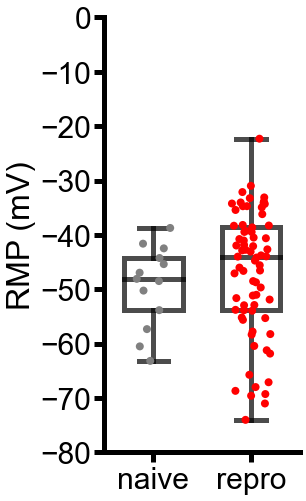

In [163]:
data = [rmp_naive, rmp_repro]
labels = ['naive', 'repro']
name='RMP'

c='k'
fig, ax = plt.subplots(figsize=(14/4,8))
alpha=0.7
standard_props = {"color":c, "alpha":alpha, "linewidth":5}
markers= ['D','o']
line_props = standard_props
bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
median_props = standard_props
cap_props = standard_props
linewidth = 5
fontsize = 30

ax.tick_params(length=6, width=linewidth)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.tick_params(length=10, width=linewidth)
#ax.set_xlim([0, 100])
ax.set_ylim([-80, 0])
plt.xticks(fontname="Arial", fontsize=fontsize)
plt.yticks(fontname="Arial", fontsize=fontsize)

#ax.hlines(y=-10, xmin=0, xmax=1, linewidth=linewidth, color = 'k',  linestyle='-')
#ax.text(y=-8, x=0.3, s='n.s.',  fontname="Arial", fontweight='bold', fontsize=26)


plt.ylabel('RMP (mV)', fontname="Arial", fontsize=32)


sns.boxplot(data=data, width=0.6, whiskerprops=line_props, boxprops=bbox_props
            ,capprops=cap_props, medianprops=median_props, fliersize=0)
sns.stripplot(data=data, ax=ax, palette=['gray', 'r'], dodge=True, jitter=0.2, size=8, marker='o')
ax.set_xticklabels(labels, fontname="Arial", fontsize=fontsize)


plt.savefig('Boxplots/'+name+'.png', bbox_inches = "tight")

plt.show()

In [153]:
statistic(rmp_naive, rmp_repro)

Mann Whitney U: p-value=2.3752423294


## Inward currents

In [291]:
currents_in_repro = currents_all['14dpi']['inward currents']+currents_all['15dpi']['inward currents']+currents_all['16dpi']['inward currents']+currents_all['17dpi']['inward currents']
currents_in_naive = currents_all['drg']['inward currents']

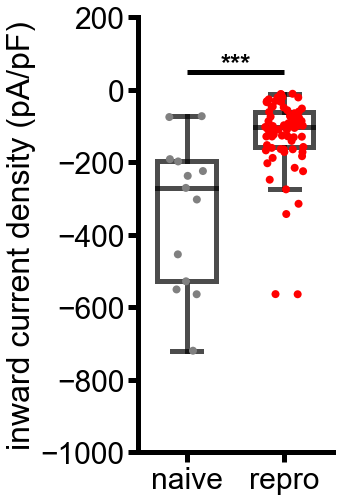

In [304]:
data = [currents_in_naive, currents_in_repro]
labels = ['naive', 'repro']
name='inward currents'

c='k'
fig, ax = plt.subplots(figsize=(14/4,8))
alpha=0.7
standard_props = {"color":c, "alpha":alpha, "linewidth":5}
markers= ['D','o']
line_props = standard_props
bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
median_props = standard_props
cap_props = standard_props
linewidth = 5
fontsize = 30

ax.tick_params(length=6, width=linewidth)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.tick_params(length=10, width=linewidth)
#ax.set_xlim([0, 100])
ax.set_ylim([-1000, 200])
plt.xticks(fontname="Arial", fontsize=fontsize)
plt.yticks(fontname="Arial", fontsize=fontsize)

ax.hlines(y=50, xmin=0, xmax=1, linewidth=linewidth, color = 'k',  linestyle='-')
ax.text(y=50.1, x=0.35, s='***',  fontname="Arial", fontweight='bold', fontsize=26)


plt.ylabel('inward current density (pA/pF)', fontname="Arial", fontsize=32)


sns.boxplot(data=data, width=0.6, whiskerprops=line_props, boxprops=bbox_props
            ,capprops=cap_props, medianprops=median_props, fliersize=0)
sns.stripplot(data=data, ax=ax, palette=['gray', 'r'], dodge=True, jitter=0.2, size=8, marker='o')
ax.set_xticklabels(labels, fontname="Arial", fontsize=fontsize)


plt.savefig('Boxplots/'+name+'.png', bbox_inches = "tight")

plt.show()

In [302]:
statistic(currents_in_naive, currents_in_repro)

Mann Whitney U: p-value=0.0008197458


## Outward currents

In [303]:
currents_out_repro = currents_all['14dpi']['outward currents']+currents_all['15dpi']['outward currents']+currents_all['16dpi']['outward currents']+currents_all['17dpi']['outward currents']
currents_out_naive = currents_all['drg']['outward currents']

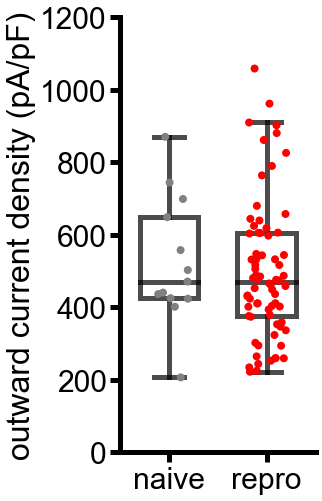

In [310]:
data = [currents_out_naive, currents_out_repro]
labels = ['naive', 'repro']
name='outward currents'

c='k'
fig, ax = plt.subplots(figsize=(14/4,8))
alpha=0.7
standard_props = {"color":c, "alpha":alpha, "linewidth":5}
markers= ['D','o']
line_props = standard_props
bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
median_props = standard_props
cap_props = standard_props
linewidth = 5
fontsize = 30

ax.tick_params(length=6, width=linewidth)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.tick_params(length=10, width=linewidth)
#ax.set_xlim([0, 100])
ax.set_ylim([0, 1200])
plt.xticks(fontname="Arial", fontsize=fontsize)
plt.yticks(fontname="Arial", fontsize=fontsize)

#ax.hlines(y=11, xmin=0, xmax=1, linewidth=linewidth, color = 'k',  linestyle='-')
#ax.text(y=11.1, x=0.35, s='***',  fontname="Arial", fontweight='bold', fontsize=26)


plt.ylabel('outward current density (pA/pF)', fontname="Arial", fontsize=32)


sns.boxplot(data=data, width=0.6, whiskerprops=line_props, boxprops=bbox_props
            ,capprops=cap_props, medianprops=median_props, fliersize=0)
sns.stripplot(data=data, ax=ax, palette=['gray', 'r'], dodge=True, jitter=0.2, size=8, marker='o')
ax.set_xticklabels(labels, fontname="Arial", fontsize=fontsize)


plt.savefig('Boxplots/'+name+'.png', bbox_inches = "tight")

plt.show()

In [308]:
statistic(currents_out_naive, currents_out_repro)

Mann Whitney U: p-value=4.4820227559


In [141]:
keys = ap_all['14dpi'][0].keys() 
ap_merge = {}
for i in ap_all:
    list_tuple = list(zip(*[[dct[k] for k in keys] for dct in ap_all[i]]))
    ap_merge[i] = dict(zip(keys, [list(ele) for ele in list_tuple]))

properties = ['firing_threshold', 'amplitude_max', 'amplitude_min', 'spike_width_0mV', 'spike_width']

firing_threshold_repro = ap_merge['14dpi']['firing_threshold']+ap_merge['15dpi']['firing_threshold']+ap_merge['16dpi']['firing_threshold']+ap_merge['17dpi']['firing_threshold']
firing_threshold_naive = ap_merge['drg']['firing_threshold']

amplitude_max_repro = ap_merge['14dpi']['amplitude_max']+ap_merge['15dpi']['amplitude_max']+ap_merge['16dpi']['amplitude_max']+ap_merge['17dpi']['amplitude_max']
amplitude_max_naive = ap_merge['drg']['amplitude_max']

amplitude_min_repro = ap_merge['14dpi']['amplitude_min']+ap_merge['15dpi']['amplitude_min']+ap_merge['16dpi']['amplitude_min']+ap_merge['17dpi']['amplitude_min']
amplitude_min_naive = ap_merge['drg']['amplitude_min']

spike_width_0mV_repro = ap_merge['14dpi']['spike_width_0mV']+ap_merge['15dpi']['spike_width_0mV']+ap_merge['16dpi']['spike_width_0mV']+ap_merge['17dpi']['spike_width_0mV']
spike_width_0mV_naive = ap_merge['drg']['spike_width_0mV']

spike_width_repro = ap_merge['14dpi']['spike_width']+ap_merge['15dpi']['spike_width']+ap_merge['16dpi']['spike_width']+ap_merge['17dpi']['spike_width']
spike_width_naive = ap_merge['drg']['spike_width']

## firing threshold

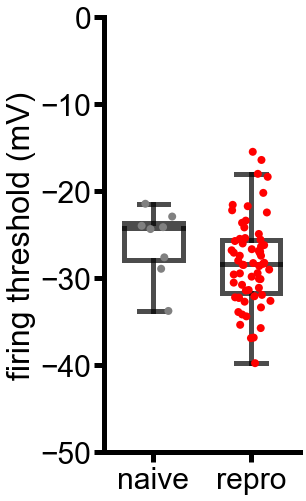

In [165]:
data = [firing_threshold_naive, firing_threshold_repro]
labels = ['naive', 'repro']
name='firing threshold'

c='k'
fig, ax = plt.subplots(figsize=(14/4,8))
alpha=0.7
standard_props = {"color":c, "alpha":alpha, "linewidth":5}
markers= ['D','o']
line_props = standard_props
bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
median_props = standard_props
cap_props = standard_props
linewidth = 5
fontsize = 30

ax.tick_params(length=6, width=linewidth)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.tick_params(length=10, width=linewidth)
#ax.set_xlim([0, 100])
ax.set_ylim([-50, 0])
plt.xticks(fontname="Arial", fontsize=fontsize)
plt.yticks(fontname="Arial", fontsize=fontsize)

#ax.hlines(y=11, xmin=0, xmax=1, linewidth=linewidth, color = 'k',  linestyle='-')
#ax.text(y=11.1, x=0.35, s='***',  fontname="Arial", fontweight='bold', fontsize=26)


plt.ylabel('firing threshold (mV)', fontname="Arial", fontsize=32)


sns.boxplot(data=data, width=0.6, whiskerprops=line_props, boxprops=bbox_props
            ,capprops=cap_props, medianprops=median_props, fliersize=0)
sns.stripplot(data=data, ax=ax, palette=['gray', 'r'], dodge=True, jitter=0.2, size=8, marker='o')
ax.set_xticklabels(labels, fontname="Arial", fontsize=fontsize)


plt.savefig('Boxplots/'+name+'.png', bbox_inches = "tight")

plt.show()

In [143]:
statistic(firing_threshold_naive, firing_threshold_repro)

t-test
p-value=1.9088138433


## Amplitude max

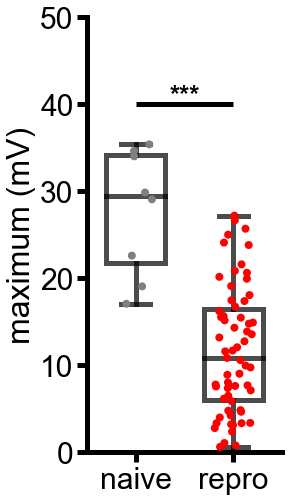

In [312]:
data = [amplitude_max_naive, amplitude_max_repro]
labels = ['naive', 'repro']
name='amplitude max'

c='k'
fig, ax = plt.subplots(figsize=(14/4,8))
alpha=0.7
standard_props = {"color":c, "alpha":alpha, "linewidth":5}
markers= ['D','o']
line_props = standard_props
bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
median_props = standard_props
cap_props = standard_props
linewidth = 5
fontsize = 30

ax.tick_params(length=6, width=linewidth)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.tick_params(length=10, width=linewidth)
#ax.set_xlim([0, 100])
ax.set_ylim([0, 50])
plt.xticks(fontname="Arial", fontsize=fontsize)
plt.yticks(fontname="Arial", fontsize=fontsize)

ax.hlines(y=40, xmin=0, xmax=1, linewidth=linewidth, color = 'k',  linestyle='-')
ax.text(y=40.1, x=0.35, s='***',  fontname="Arial", fontweight='bold', fontsize=26)


plt.ylabel('maximum (mV)', fontname="Arial", fontsize=32)


sns.boxplot(data=data, width=0.6, whiskerprops=line_props, boxprops=bbox_props
            ,capprops=cap_props, medianprops=median_props, fliersize=0)
sns.stripplot(data=data, ax=ax, palette=['gray', 'r'], dodge=True, jitter=0.2, size=8, marker='o')
ax.set_xticklabels(labels, fontname="Arial", fontsize=fontsize)


plt.savefig('Boxplots/'+name+'.png', bbox_inches = "tight")

plt.show()

In [145]:
statistic(amplitude_max_naive, amplitude_max_repro)

t-test
p-value=0.0000011278


## Amplitude min

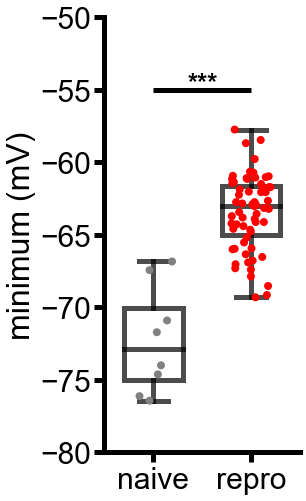

In [313]:
data = [amplitude_min_naive, amplitude_min_repro]
labels = ['naive', 'repro']
name='amplitude min'

c='k'
fig, ax = plt.subplots(figsize=(14/4,8))
alpha=0.7
standard_props = {"color":c, "alpha":alpha, "linewidth":5}
markers= ['D','o']
line_props = standard_props
bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
median_props = standard_props
cap_props = standard_props
linewidth = 5
fontsize = 30

ax.tick_params(length=6, width=linewidth)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.tick_params(length=10, width=linewidth)
#ax.set_xlim([0, 100])
ax.set_ylim([-80, -50])
plt.xticks(fontname="Arial", fontsize=fontsize)
plt.yticks(fontname="Arial", fontsize=fontsize)

ax.hlines(y=-55, xmin=0, xmax=1, linewidth=linewidth, color = 'k',  linestyle='-')
ax.text(y=-55.1, x=0.35, s='***',  fontname="Arial", fontweight='bold', fontsize=26)


plt.ylabel('minimum (mV)', fontname="Arial", fontsize=32)


sns.boxplot(data=data, width=0.6, whiskerprops=line_props, boxprops=bbox_props
            ,capprops=cap_props, medianprops=median_props, fliersize=0)
sns.stripplot(data=data, ax=ax, palette=['gray', 'r'], dodge=True, jitter=0.2, size=8, marker='o')
ax.set_xticklabels(labels, fontname="Arial", fontsize=fontsize)


plt.savefig('Boxplots/'+name+'.png', bbox_inches = "tight")

plt.show()

In [170]:
statistic(amplitude_min_naive, amplitude_min_repro)

t-test
p-value=0.0000000000


## spike width at -20 mV

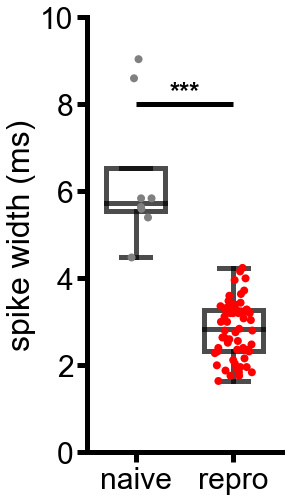

In [169]:
data = [spike_width_naive, spike_width_repro]
labels = ['naive', 'repro']
name='spike width'

c='k'
fig, ax = plt.subplots(figsize=(14/4,8))
alpha=0.7
standard_props = {"color":c, "alpha":alpha, "linewidth":5}
markers= ['D','o']
line_props = standard_props
bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
median_props = standard_props
cap_props = standard_props
linewidth = 5
fontsize = 30

ax.tick_params(length=6, width=linewidth)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.tick_params(length=10, width=linewidth)
#ax.set_xlim([0, 100])
ax.set_ylim([0, 10])
plt.xticks(fontname="Arial", fontsize=fontsize)
plt.yticks(fontname="Arial", fontsize=fontsize)

ax.hlines(y=8, xmin=0, xmax=1, linewidth=linewidth, color = 'k',  linestyle='-')
ax.text(y=8.1, x=0.35, s='***',  fontname="Arial", fontweight='bold', fontsize=26)


plt.ylabel('spike width (ms)', fontname="Arial", fontsize=32)


sns.boxplot(data=data, width=0.6, whiskerprops=line_props, boxprops=bbox_props
            ,capprops=cap_props, medianprops=median_props, fliersize=0)
sns.stripplot(data=data, ax=ax, palette=['gray', 'r'], dodge=True, jitter=0.2, size=8, marker='o')
ax.set_xticklabels(labels, fontname="Arial", fontsize=fontsize)


plt.savefig('Boxplots/'+name+'.png', bbox_inches = "tight")

plt.show()

In [171]:
statistic(amplitude_min_naive, amplitude_min_repro)

t-test
p-value=0.0000000000


In [180]:
keys = trains_all['14dpi'][0].keys() 
trains_merge = {}
for i in ap_all:
    list_tuple = list(zip(*[[dct[k] for k in keys] for dct in trains_all[i]]))
    trains_merge[i] = dict(zip(keys, [list(ele) for ele in list_tuple]))

rheobase_repro = trains_merge['14dpi']['rheobase']+trains_merge['15dpi']['rheobase']+trains_merge['16dpi']['rheobase']+trains_merge['17dpi']['rheobase']
rheobase_naive = trains_merge['drg']['rheobase']

max_frequency_repro = trains_merge['14dpi']['max_frequency']+trains_merge['15dpi']['max_frequency']+trains_merge['16dpi']['max_frequency']+trains_merge['17dpi']['max_frequency']
max_frequency_naive = trains_merge['drg']['max_frequency']

max_ap_number_repro = trains_merge['14dpi']['max_ap_number']+trains_merge['15dpi']['max_ap_number']+trains_merge['16dpi']['max_ap_number']+trains_merge['17dpi']['max_ap_number']
max_ap_number_naive = trains_merge['drg']['max_ap_number']

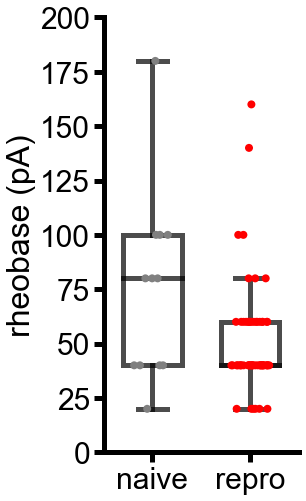

In [186]:
data = [rheobase_naive, rheobase_repro]
labels = ['naive', 'repro']
name='rheobase'

c='k'
fig, ax = plt.subplots(figsize=(14/4,8))
alpha=0.7
standard_props = {"color":c, "alpha":alpha, "linewidth":5}
markers= ['D','o']
line_props = standard_props
bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
median_props = standard_props
cap_props = standard_props
linewidth = 5
fontsize = 30

ax.tick_params(length=6, width=linewidth)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.tick_params(length=10, width=linewidth)
#ax.set_xlim([0, 100])
ax.set_ylim([0, 200])
plt.xticks(fontname="Arial", fontsize=fontsize)
plt.yticks(fontname="Arial", fontsize=fontsize)

#ax.hlines(y=8, xmin=0, xmax=1, linewidth=linewidth, color = 'k',  linestyle='-')
#ax.text(y=8.1, x=0.35, s='***',  fontname="Arial", fontweight='bold', fontsize=26)


plt.ylabel('rheobase (pA)', fontname="Arial", fontsize=32)


sns.boxplot(data=data, width=0.6, whiskerprops=line_props, boxprops=bbox_props
            ,capprops=cap_props, medianprops=median_props, fliersize=0)
sns.stripplot(data=data, ax=ax, palette=['gray', 'r'], dodge=True, jitter=0.2, size=8, marker='o')
ax.set_xticklabels(labels, fontname="Arial", fontsize=fontsize)

plt.savefig('Boxplots/'+name+'.png', bbox_inches = "tight")

plt.show()

In [284]:
statistic(rheobase_naive, rheobase_repro)

t-test
p-value=0.1087293182


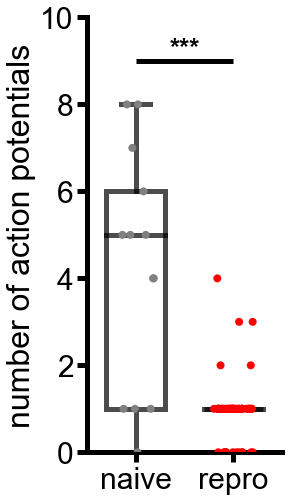

In [322]:
data = [max_ap_number_naive, max_ap_number_repro]
labels = ['naive', 'repro']
name='firing frequency'

c='k'
fig, ax = plt.subplots(figsize=(14/4,8))
alpha=0.7
standard_props = {"color":c, "alpha":alpha, "linewidth":5}
markers= ['D','o']
line_props = standard_props
bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
median_props = standard_props
cap_props = standard_props
linewidth = 5
fontsize = 30

ax.tick_params(length=6, width=linewidth)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.tick_params(length=10, width=linewidth)
#ax.set_xlim([0, 100])
ax.set_ylim([0, 10])
plt.xticks(fontname="Arial", fontsize=fontsize)
plt.yticks(fontname="Arial", fontsize=fontsize)

ax.hlines(y=9, xmin=0, xmax=1, linewidth=linewidth, color = 'k',  linestyle='-')
ax.text(y=9.1, x=0.35, s='***',  fontname="Arial", fontweight='bold', fontsize=26)


plt.ylabel('number of action potentials', fontname="Arial", fontsize=32)


sns.boxplot(data=data, width=0.6, whiskerprops=line_props, boxprops=bbox_props
            ,capprops=cap_props, medianprops=median_props, fliersize=0)
sns.stripplot(data=data, ax=ax, palette=['gray', 'r'], dodge=True, jitter=0.2, size=8, marker='o')
ax.set_xticklabels(labels, fontname="Arial", fontsize=fontsize)

plt.savefig('Boxplots/'+name+'_stars.png', bbox_inches = "tight")

plt.show()

In [323]:
statistic(max_ap_number_naive, max_ap_number_repro)

Mann Whitney U: p-value=0.0000702816


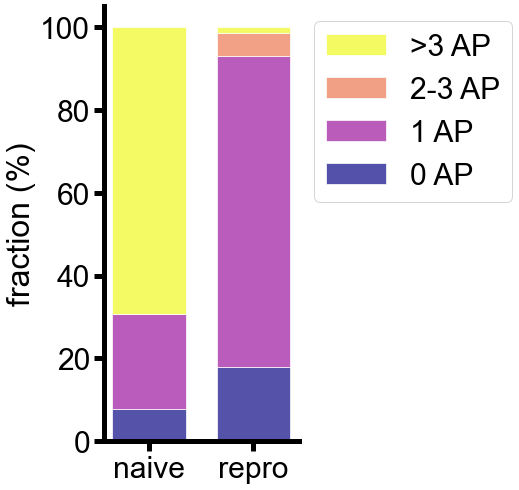

In [324]:
name = 'AP firing'

plt.figure(figsize=(14/4,8))
# Data
r = [0,1]
naive = np.array(max_ap_number_naive)
repro = np.array(max_ap_number_repro)
 
# From raw value to percentage
no_ap = np.array([len(naive[naive == 0]) / len(naive), len(repro[repro == 0]) / len(repro)])*100
one_ap = np.array([len(naive[naive == 1]) / len(naive), len(repro[repro == 1]) / len(repro)])*100
few_ap = np.array([len(naive[(1 < naive) & (naive <=3)]) / len(naive), len(repro[(1 < repro) & (repro <=3)]) / len(repro)])*100
most_ap = np.array([len(naive[naive > 3]) / len(naive), len(repro[repro > 3]) / len(repro)])*100


# plot
barWidth = 0.7
names = ['naive', 'repro']

plt.bar(r, no_ap, color='#0D0887', edgecolor='white', width=barWidth, label='0 AP', alpha=0.7)
plt.bar(r, one_ap, bottom=no_ap, color='#9C179E', edgecolor='white', width=barWidth, label='1 AP', alpha=0.7)
plt.bar(r, few_ap, bottom=[i+j for i,j in zip(no_ap, one_ap)], color='#ED7953', edgecolor='white', width=barWidth, label='2-3 AP', alpha=0.7)
plt.bar(r, most_ap, bottom=[i+j+k for i,j,k in zip(no_ap, one_ap,few_ap)], color='#F0F921', edgecolor='white', width=barWidth, label='>3 AP', alpha=0.7)




# Custom x axis
fontsize = 30
ax=plt.gca()
ax.tick_params(length=6, width=linewidth)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
plt.tick_params(length=10, width=5)
plt.xticks(r, names)
plt.xticks(fontname="Arial", fontsize=fontsize)
plt.yticks(fontname="Arial", fontsize=fontsize)


handles, labels = plt.gca().get_legend_handles_labels()

plt.legend([handles[i] for i in [3,2,1,0]], [labels[i] for i in [3,2,1,0]], 
           loc='upper left', bbox_to_anchor=(1,1), ncol=1, prop={'family':"Arial", 'size':30})

plt.ylabel('fraction (%)', fontname="Arial", fontsize=32)

plt.savefig('Boxplots/'+name+'.png', bbox_inches = "tight")
# Show graphic
plt.show()



In [268]:
import cmasher as cmr

colors = cmr.take_cmap_colors('plasma', 4, return_fmt='hex')

In [269]:
colors

['#0D0887', '#9C179E', '#ED7953', '#F0F921']